<span style="font-size: 14pt">Домашнее задание №8 </span>

<span style="color: red; font-size: 14pt">Deadline: 20.05.2017 23:59:59</span>

<span style="font-size: 10pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, Модуль Unspervised Learning, </span>

<span style="color:blue; font-size: 10pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 10pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Воронцов К. В. Математические методы обучения по прецедентам. 2012. http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf (разделы 5.2 и 7.1)
- Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning. Springer: Data Mining, Inference, and Prediction.  — 2nd ed. — Springer-Verlag. 2009. — 746 p.http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf (глава 14)



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_fall 496 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2017_496_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Дедлайн жесткий, в том числе помтоу что это ДЗ последнее в курсе. 

<h1 align="center">Контрольные вопросы (0 % - для самоконтроля) </h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В чём заключается проблема мультиколлинеарности?

**Вопрос 2**: Какие проблемы при обучении алгоритмов возникают из-за большой разамерности пространства признаков?

**Вопрос 3**: В чем суть проклятия размерности?

** Вопрос 4**: Какая связь между решением задачи PCA и SVD-разложение матрицы регрессии?

** Вопрос 5**: Почему в tSNE расстояние между парамми объектов измеряется "по-стьюденту" и как это помогает решить проблему "скрученности" (crowding problem)?

**Вопрос 6**: На какой идее базируются алгоритмы аггломеративной кластеризации? Напишите формулу Ланса-Вильма

**Вопрос 7**: Какие два шага выделяют в алгоритме кластеризации k-means?

**Вопрос 8**: В чём отличия (основные упрощения) k-means от EM-алгоритма кластеризации?

** Вопрос 9 **Какой принцип работы графовых алгоритмов кластеризации?

** Вопрос 10 **  В чем некорректность постановки задачи кластеризации?

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Вопросы по теории (30%) </h1> 

** Задача 1 ** 
Ответьте на вопросы:

 1) Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?
 2) Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 
 3) Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?
 4) Каким образом приближают «центр кластера» в нелинейных пространствах?
 5) Каким образом можно определять число кластеров?
 
** Задача 2 **
Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма  K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.

** Задача 3 **
Докажите, что the k-means всегда сходится.

** Задача 4 **
Для сжатия размерности пространства алгоритм PCA применяется датасету с количеством признаков $D = 100$. Наблюдается следующий спектр собственных значений матрицы объектов-признаков. 
<img src="PCA_lambda.png" width="600">
Ответье на вопросы

* 1) Высокая ли эффективная размерность пространства признаков (intrinsic dimensionality) (насколько она близка к 100)?
* 2) Можно ли перевести датасет с помощью PCA в пространство меньшей размерности с минимальными потерями точности? Если да, то чему примерно будет равна размернось 

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    # F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F.dot(np.transpose(F))
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = np.linalg.svd(Sigma, full_matrices=False)
    lambdas, h = np.linalg.eigh(Sigma)

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = int(n*varRetained)
    print '%.2f %% variance retained in %d dimensions' %(var_i[m], m) 
    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = U[:][:m]  #только m главных компонент
    G = U_reduced.T.dot(np.diag(d[:m])).dot(V[:m])

    return G, U_reduced


In [2]:
# Примените алгоритм к данным MNIST
from sklearn.cross_validation import train_test_split

from sklearn.datasets import load_digits
Data = load_digits(n_class=10)
X = Data['data']
y = Data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

C:\Users\GTA\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Performing PCA - Principal COmponent Analysis
100.00 % variance retained in 60 dimensions


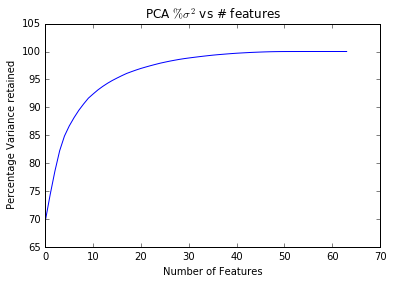

In [3]:
#################################################################
# PCA of training set
print 'Performing PCA - Principal COmponent Analysis'

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

In [4]:
print Z.round(0)
print U_reduced.round(2)

[[   0.    0.    2. ...,   18.    8.    2.]
 [   0.    0.    1. ...,   12.    2.    0.]
 [   0.    0.    0. ...,   -3.   -1.    0.]
 ..., 
 [   0.  -15. -270. ..., -350. -105.  -18.]
 [   0.    0.    0. ...,    0.    0.    1.]
 [   0.    0.    0. ...,   -1.    1.    1.]]
[[ 0.    0.    0.   ...,  1.    0.    0.  ]
 [-0.01 -0.02  0.01 ...,  0.    0.    0.  ]
 [-0.1  -0.22  0.04 ...,  0.    0.    0.  ]
 ..., 
 [-0.01 -0.01  0.01 ...,  0.    0.    0.  ]
 [-0.11 -0.24  0.07 ...,  0.    0.    0.  ]
 [-0.23 -0.14 -0.03 ...,  0.    0.    0.  ]]


<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.

### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

In [5]:
from sklearn import cluster
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

In [6]:
Data = load_digits()

In [7]:
X = pd.DataFrame(Data['data'])
y = pd.DataFrame(Data['target'])

In [8]:
alg = cluster.dbscan_.DBSCAN(eps = 23, min_samples=5, metric='euclidean', algorithm='brute')
y_pred = alg.fit_predict(X)
print "Adjusted Mutual Information: ", adjusted_mutual_info_score(y.values.reshape(X.shape[0],), y_pred)
print "Adjusted Rand Index: ", adjusted_rand_score(y.values.reshape(X.shape[0],), y_pred)

Adjusted Mutual Information:  0.518066110609
Adjusted Rand Index:  0.280285028473


In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
epss = [20, 22, 22.5,  23, 23.5, 24, 26,30]
min_sampless = [5,10,20,30,50]
adj_mutual_score = []
adj_rand_score = []
for ep in epss:
    adj_mut = []
    adj_rand = []
    for ms in min_sampless:
        alg = cluster.DBSCAN(eps = ep, min_samples=ms)
        y_pred = alg.fit_predict(X)
        adj_mut.append(adjusted_mutual_info_score(y.values.reshape(X.shape[0],), y_pred ))
        adj_rand.append(adjusted_rand_score(y.values.reshape(X.shape[0],), y_pred))
    adj_mutual_score.append(adj_mut)
    adj_rand_score.append(adj_rand)

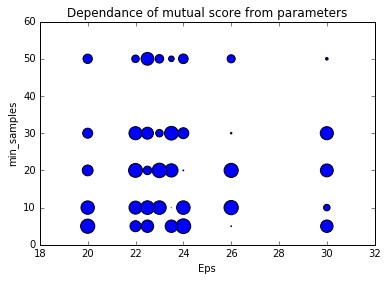

In [11]:
plt.scatter(epss*len(min_sampless),min_sampless*len(epss),s=np.multiply(adj_mutual_score,300))
plt.xlabel('Eps')
plt.ylabel('min_samples')
plt.title('Dependance of mutual score from parameters')

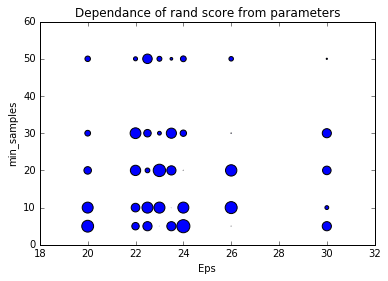

In [12]:
plt.scatter(epss*len(min_sampless),min_sampless*len(epss),s=np.multiply(adj_rand_score,300))
plt.xlabel('Eps')
plt.ylabel('min_samples')
plt.title('Dependance of rand score from parameters')

Визуализируем изображения из core, используя параметры eps = 23, min_samples=5

In [13]:
alg = cluster.dbscan_.DBSCAN(eps = 23, min_samples=5, metric='euclidean', algorithm='brute')
y_pred = alg.fit_predict(X)
Result_data = pd.DataFrame(np.hstack((X, y_pred.reshape(X.shape[0],1))))

#### Примеры цифр из различных классов, при количестве кластеров 10

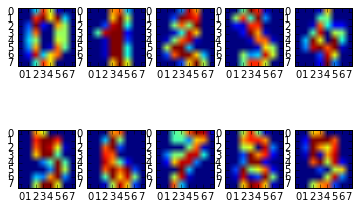

In [14]:
for i in range(10):
    index_for_image = Result_data[Result_data[64] == i].index[0]
    plt.subplot(2,5,i+1)
    #plt.figure(i+1, figsize=(2, 5))
    plt.imshow(Data.images[i], )
plt.show()

#### Визуализация выбросов

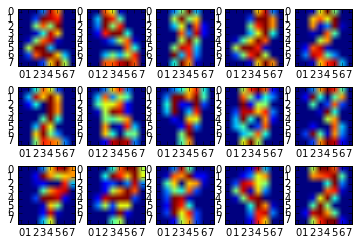

In [15]:
index_for_image = Result_data[Result_data[64] == -1].index
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(Data.images[index_for_image[5*i]], )
plt.show()

Среди выбросов наблюдаются как очень размазанные цифры, так и различимые глазом

In [16]:
from PIL import Image, ImageDraw
from time import time
from skimage.measure import compare_ssim

In [17]:
img = Image.open("two-lorikeet-birds-2293918.jpg")
img_data = img.load()

In [18]:
data_for_image = []
for i in range(img.size[0]):
    for j in range(img.size[1]):
        data_for_image.append(img_data[i,j])

In [19]:
data_for_image = pd.DataFrame(data_for_image, dtype=np.dtype(np.uint8))

In [20]:
data_for_image.head()

,0,1,2
0,140,150,116
1,138,148,114
2,136,146,112
3,139,149,115
4,142,152,118


## Kmeans

In [24]:
img_kmeans = Image.new("RGB", img.size, (0,0,0))
img_kmeans_data = img_kmeans.load()
draw = ImageDraw.ImageDraw(img_kmeans)
num_clusters_kmeans = [2,3,10,20,40,80]
ssim_kmeans = []
for n_c in num_clusters_kmeans:
    time_start = time()
    kmean = cluster.KMeans(n_clusters=n_c)
    y_pred = kmean.fit_predict(data_for_image)
    kmeans_data_for_ssim = []
    kmeans_clust_centers = []
    for clust in range(n_c):
        kmeans_clust_centers.append((int(kmean.cluster_centers_[clust][0]),int(kmean.cluster_centers_[clust][1]),
                                        int(kmean.cluster_centers_[clust][2])))
    
    for i in range(110000):
        kmeans_data_for_ssim.append(kmeans_clust_centers[y_pred[i]])
    kmeans_data_for_ssim = pd.DataFrame(kmeans_data_for_ssim, dtype=np.dtype(np.uint8))
    ssim_kmeans.append(compare_ssim(data_for_image.values, kmeans_data_for_ssim.values, multichannel=True))
    
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            draw.point((i, j), kmeans_clust_centers[y_pred[i*img.size[1] + j]])
    img_kmeans.save("C:/Users/GTA/Documents/ml_mipt/kmeans_%d_clusters.jpg" %n_c, "jpeg")
    print "time for %d clusters: %.3f" %(n_c, time() - time_start)

time for 2 clusters: 1.515
time for 3 clusters: 1.883
time for 10 clusters: 13.046
time for 20 clusters: 21.046
time for 40 clusters: 75.269
time for 80 clusters: 149.094


## AgglomerativeClustering

Для обучени AgglomerativeClustering было использовано 10000 точек, остальные были разделены по кластерам по степани близости к центрам кластеров.

In [27]:
def cluster_number(clust_centers, point):
    num_of_clust = 0
    distance = (clust_centers[0][0] - point[0])**2 + (clust_centers[0][1] - point[1])**2 + (clust_centers[0][2] - point[2])**2
    for i in range(len(clust_centers)):
        #print (clust_centers[i][0]*point[0] + clust_centers[i][1]*point[1] + clust_centers[i][2]*point[2])
        if ((clust_centers[i][0] - point[0])**2 + (clust_centers[i][1] - point[1])**2 + (clust_centers[i][2] - point[2]))<distance:
            #print distance
            num_of_clust = i
            distance = (clust_centers[i][0] - point[0])**2 + (clust_centers[i][1] - point[1])**2 + (clust_centers[i][2] - point[2])**2

    return num_of_clust

In [31]:
img_aggl = Image.new("RGB", img.size, (0,0,0))
img_aggl_data = img_aggl.load()
draw = ImageDraw.ImageDraw(img_aggl)
N = 10000 # число пикселей для кластеризации
num_clusters = [2,3,10,20,40,80]
ssim_aggl = []
for n_c in num_clusters:
    time_start = time()
    aggl_clust_centers = []
    aggl_data_for_ssim = []
    agglClust = cluster.AgglomerativeClustering(n_clusters=n_c)
    l = range(data_for_image.shape[0])
    np.random.shuffle(l)
    piksels_for_clust = l[:N]
    agglClust.fit(data_for_image.ix[piksels_for_clust])
    result_data = pd.DataFrame(np.hstack((data_for_image.ix[piksels_for_clust],np.reshape(agglClust.labels_,(N ,1) ))), index = piksels_for_clust)
    for clust in range(n_c):
        center = result_data[result_data[3] == clust].mean()
        aggl_clust_centers.append((int(center[0]),int(center[1]),int(center[2])))
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            if (i*img.size[1] + j) in piksels_for_clust:
                draw.point((i, j), aggl_clust_centers[result_data.ix[i*img.size[1] + j].values[3]])
                aggl_data_for_ssim.append(aggl_clust_centers[result_data.ix[i*img.size[1] + j].values[3]])
            else:
                draw.point((i, j), aggl_clust_centers[cluster_number(aggl_clust_centers, data_for_image.ix[i*img.size[1] + j])])
                aggl_data_for_ssim.append(aggl_clust_centers[cluster_number(aggl_clust_centers, data_for_image.ix[i*img.size[1] + j])])
    aggl_data_for_ssim = pd.DataFrame(aggl_data_for_ssim, dtype=np.dtype(np.uint8))
    ssim_aggl.append(compare_ssim(data_for_image.values, aggl_data_for_ssim.values, multichannel=True))
    print "time for %d clusters :  %.3f" %(n_c, time()-time_start)
    img_aggl.save("C:/Users/GTA/Documents/ml_mipt/aggl_%d_clusters.jpg" %n_c, "jpeg")

time for 2 clusters :  116.305
time for 3 clusters :  134.793
time for 10 clusters :  234.898
time for 20 clusters :  342.701
time for 40 clusters :  528.281
time for 80 clusters :  894.169


C:\Users\GTA\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [33]:
ssim_aggl

[0.51129802472635921,
 0.54146899127600434,
 0.58978621521976504,
 0.62350276727234344,
 0.6320904745957393,
 0.6934885926354516]

## MeanShift

In [35]:
img_mShift = Image.new("RGB", img.size, (0,0,0))
img_mShift_data = img_mShift.load()
draw = ImageDraw.ImageDraw(img_mShift)
N = 5000 # число пикселей для кластеризации
l = range(data_for_image.shape[0])
np.random.shuffle(l)
piksels_for_clust = l[:N]
bandwiths = [100,80,60,50,40,20]
ssim_mShift = []
n_clusters = []
for bw in bandwiths:
    time_start = time()
    mShift = cluster.MeanShift(bandwidth=bw)
    mShift.fit(X = data_for_image.ix[piksels_for_clust])
    y_pred = mShift.predict(data_for_image)
    clust_centers_mShift = []
    mShift_data_for_ssim = []
    for elem in mShift.cluster_centers_:
        clust_centers_mShift.append((int(elem[0]),int(elem[1]),int(elem[2])))
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            draw.point((i, j), clust_centers_mShift[y_pred[i*img.size[1] + j]])
            mShift_data_for_ssim.append(clust_centers_mShift[y_pred[i*img.size[1] + j]])
    mShift_data_for_ssim = pd.DataFrame(mShift_data_for_ssim, dtype=np.dtype(np.uint8))
    ssim_mShift.append(compare_ssim(data_for_image.values, mShift_data_for_ssim.values, multichannel=True))
    n_clusters.append(len(np.unique(mShift.labels_)))
    img_mShift.save("C:/Users/GTA/Documents/ml_mipt/meanShift_%d_clusters.jpg" %n_clusters[-1], "jpeg")
    print "time for %d clusters :  %.3f" %(n_clusters[-1], time()-time_start)
#img_aggl.save("C:/Users/GTA/Documents/ml_mipt/aggl_%d_clusters.jpg" %n_c, "jpeg")

time for 1 clusters :  23.978
time for 2 clusters :  30.595
time for 6 clusters :  41.868
time for 11 clusters :  51.406
time for 23 clusters :  33.611
time for 177 clusters :  23.068


In [36]:
from IPython.core.display import Image, display

### Изображения Kmeans

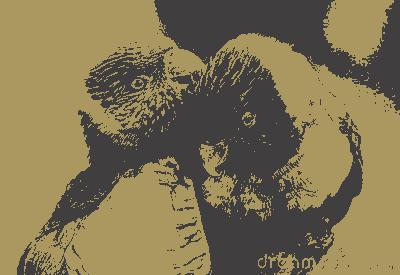

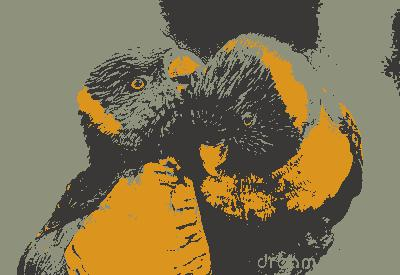

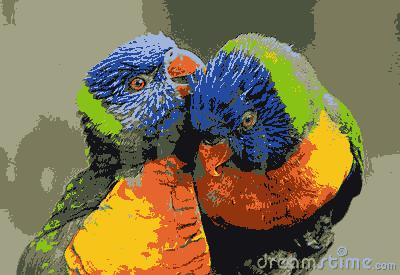

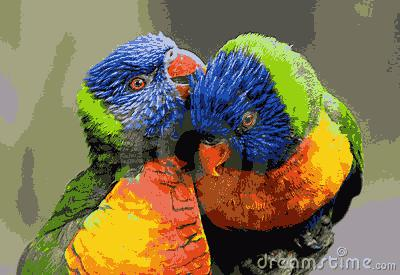

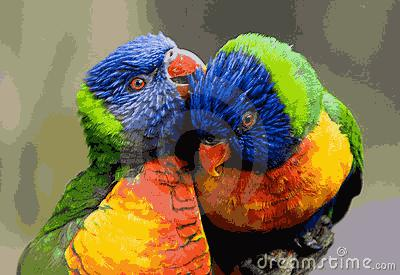

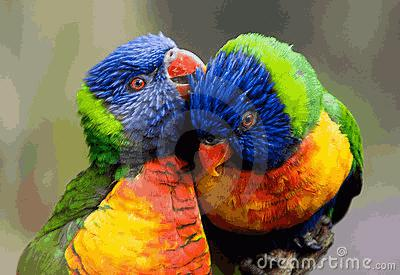

In [40]:
display(Image('pic/kmeans_2_clusters.jpg'),Image('pic/kmeans_3_clusters.jpg'),Image('pic/kmeans_10_clusters.jpg'),
        Image('pic/kmeans_20_clusters.jpg'),Image('pic/kmeans_40_clusters.jpg'),Image('pic/kmeans_80_clusters.jpg'))

### Изображения AgglomerativeClustering

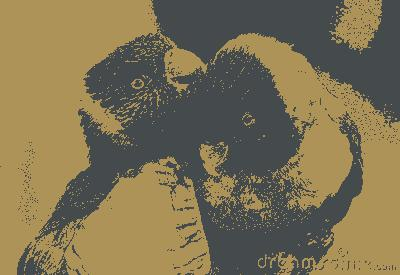

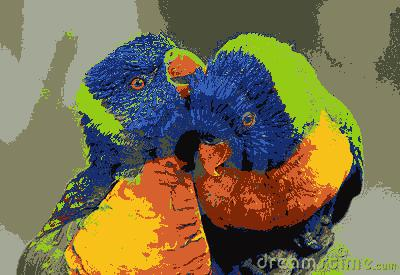

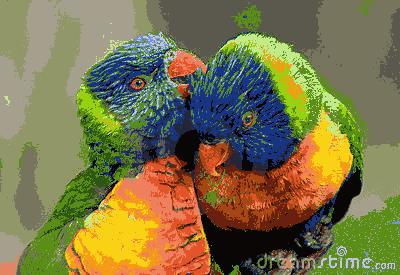

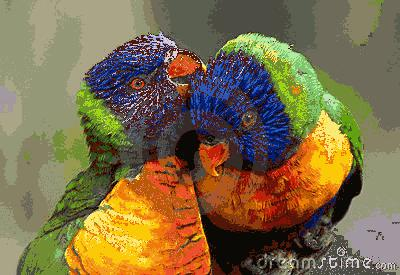

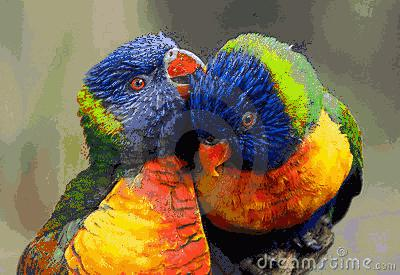

In [43]:
display(Image('pic/aggl_2_clusters.jpg'),Image('pic/aggl_5_clusters.jpg'),Image('pic/aggl_10_clusters.jpg'),
       Image('pic/aggl_20_clusters.jpg'),Image('pic/aggl_40_clusters.jpg'),Image('pic/aggl_80_clusters.jpg'))

### Изображения MeanShift

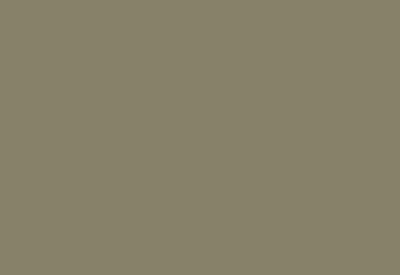

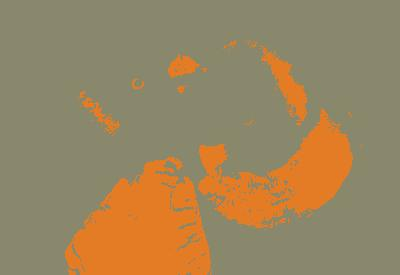

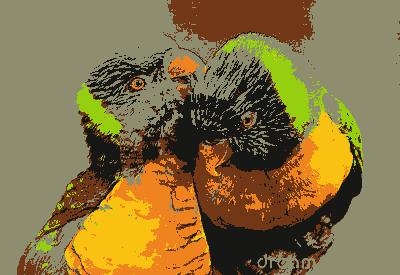

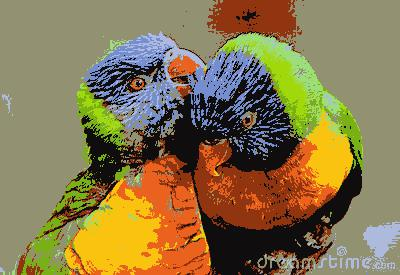

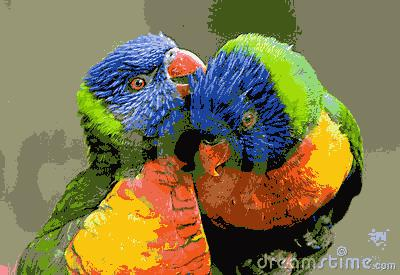

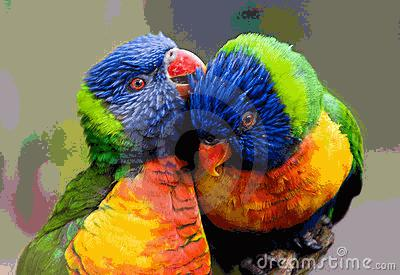

In [39]:
display(Image('pic/meanShift_1_clusters.jpg'),Image('pic/meanShift_2_clusters.jpg'),Image('pic/meanShift_6_clusters.jpg'),
       Image('pic/meanShift_11_clusters.jpg'),Image('pic/meanShift_23_clusters.jpg'),Image('pic/meanShift_177_clusters.jpg'))

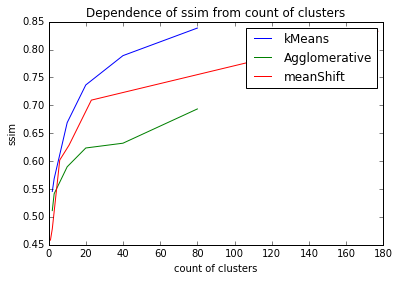

In [50]:
plt.plot(num_clusters_kmeans, ssim_kmeans, label = 'kMeans' )
plt.plot(num_clusters_kmeans,ssim_aggl, label = 'Agglomerative')
plt.plot(n_clusters,ssim_mShift, label = 'meanShift')
plt.title('Dependence of ssim from count of clusters')
plt.xlabel('count of clusters')
plt.ylabel('ssim')
plt.legend()

Лучшим алгоритмом показал себя kMeans, значение метрики ssim для него выше, а уже при 40 кластерах оно уже порядка 0.8